In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_link = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx"
df_data = pd.read_excel(dataset_link,sheet_name="Canada by Citizenship", skipfooter=2,skiprows=range(20))

#Preparing Dataset

In [3]:
df_data.shape

(195, 43)

In [4]:
df_data.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [5]:
df_data.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'],axis=1,inplace=True)

In [6]:
df_data.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [7]:
df_data.rename(columns={"OdName":"Country","AreaName":"Continent","RegName":"Region"},inplace=True)

In [8]:
df_data.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [9]:
#to insure that all colums are type str
all(isinstance(column,str) for column in df_data.columns)

False

In [10]:
df_data.columns = list(map(str,df_data.columns))

In [11]:
all(isinstance(column,str) for column in df_data.columns)

True

In [12]:
df_data.set_index('Country',inplace=True)

In [13]:
df_data.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [14]:
df_data['Total'] = df_data.sum(axis=1)

In [15]:
df_data.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [16]:
df_data.shape

(195, 38)

In [17]:
%matplotlib inline

In [18]:
years_list = list(map(str,range(1980,2014)))
years_list

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

#Area Plots

In [19]:
df_data.sort_values(['Total'],ascending=False,axis=0,inplace=True)

In [20]:
df_data.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [21]:
df_top5 = df_data.head()

In [22]:
df_top5 = df_top5[years_list].transpose()

In [23]:
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [24]:
df_top5.index = df_top5.index.map(int)

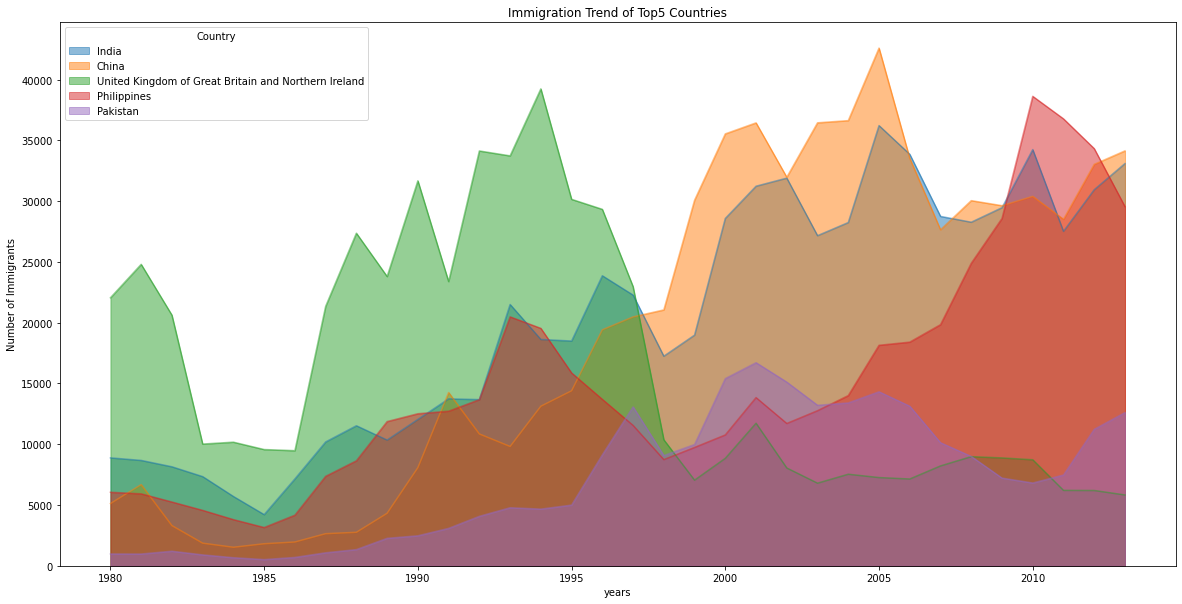

In [25]:
df_top5.plot(kind="area",stacked=False,figsize=(20,10))#alpha=0.5
plt.title('Immigration Trend of Top5 Countries')
plt.xlabel('years')
plt.ylabel('Number of Immigrants')
plt.show()

Text(0.5, 1.0, 'TOP 5 COUNTRIES IN IMMIGRATION TO CANADA')

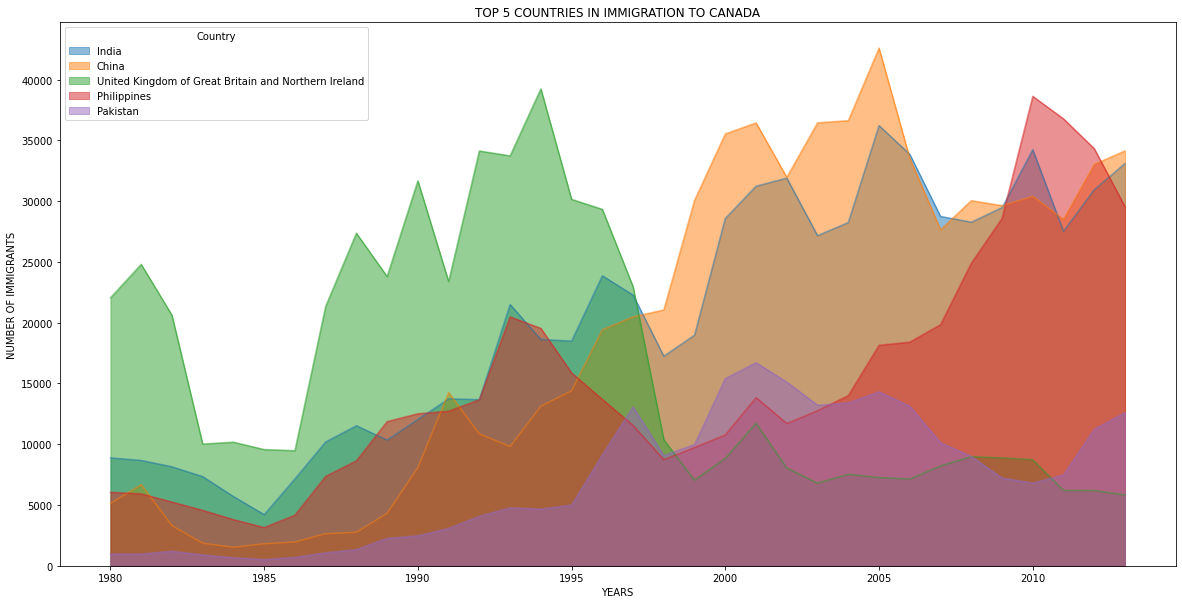

In [26]:
# this one is just another option with the artist layer 
ax = df_top5.plot(kind='area',figsize=(20,10),stacked=False)
ax.set_xlabel("YEARS")
ax.set_ylabel("NUMBER OF IMMIGRANTS")
ax.set_title("TOP 5 COUNTRIES IN IMMIGRATION TO CANADA")


#Histograms

In [27]:
df_data["2013"].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [28]:
# use np.histogram 
count, bin_edges = np.histogram(df_data['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


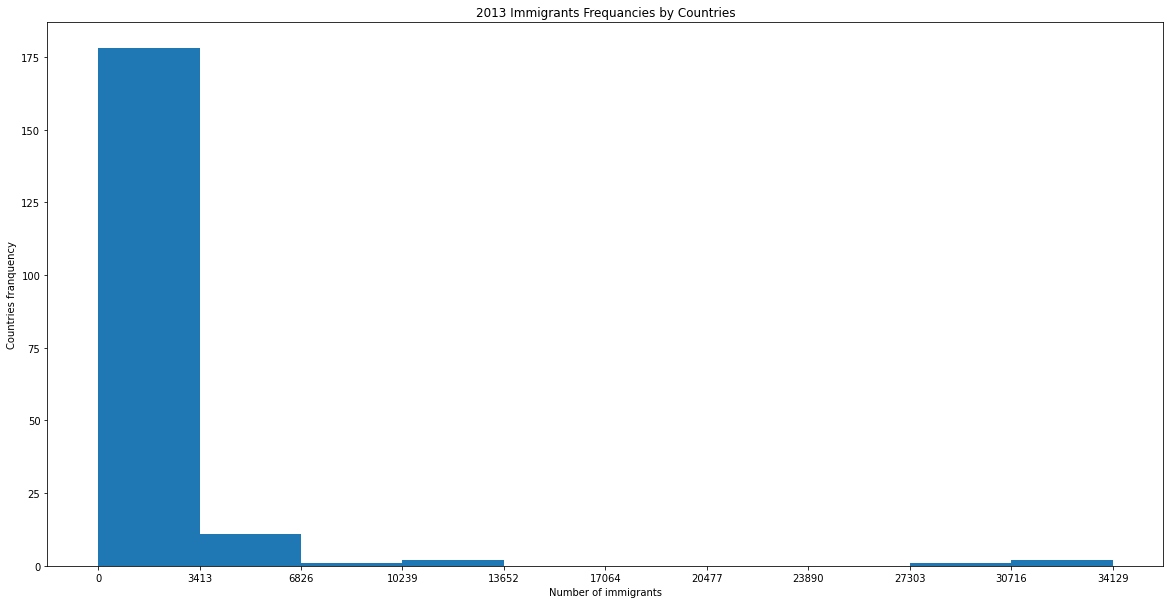

In [29]:
# plot hist
df_data['2013'].plot(kind="hist",figsize=(20,10),xticks=bin_edges)
plt.title("2013 Immigrants Frequancies by Countries")
plt.xlabel("Number of immigrants")
plt.ylabel('Countries franquency')
plt.show()

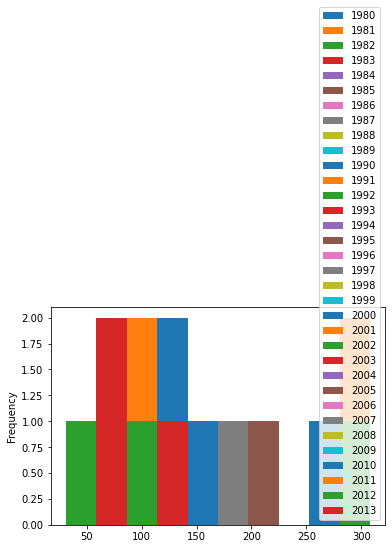

In [30]:
# qst: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?
df_data.loc[["Denmark","Norway","Sweden"],years_list].plot.hist()
# this is wrong

In [31]:
# we need to plot the population distribution across years for every country from the 3 countries
df_countries = df_data.loc[["Denmark","Norway","Sweden"],years_list].transpose()

In [32]:
df_countries.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [33]:
count_countries , bin_edges_countries = np.histogram(df_countries,15)
print(count_countries)
print(bin_edges_countries)

[ 5 13 21 14  9 10  5  9  7  3  1  0  0  2  3]
[ 31.          49.46666667  67.93333333  86.4        104.86666667
 123.33333333 141.8        160.26666667 178.73333333 197.2
 215.66666667 234.13333333 252.6        271.06666667 289.53333333
 308.        ]


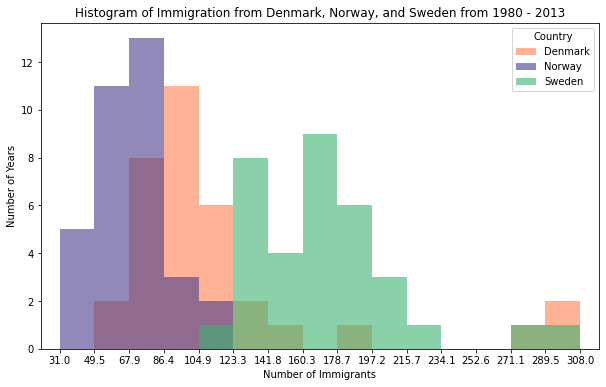

In [34]:
xmin = bin_edges_countries[0] - 10
xmax = bin_edges_countries[-1] + 10
df_countries.plot(kind="hist",
                  figsize=(10,6),
                  bins=15,
                  alpha=0.6,
                  xticks=bin_edges_countries,
                  color=['coral', 'darkslateblue', 'mediumseagreen'],
                  xlim=(xmin,xmax)
                  )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [35]:
'''
for colors in matplotlib :
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
'''

'\nfor colors in matplotlib :\nimport matplotlib\nfor name, hex in matplotlib.colors.cnames.items():\n    print(name, hex)\n'

#Bar Chart

In [36]:
df_iceland = df_data.loc['Iceland',years_list]

In [37]:
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

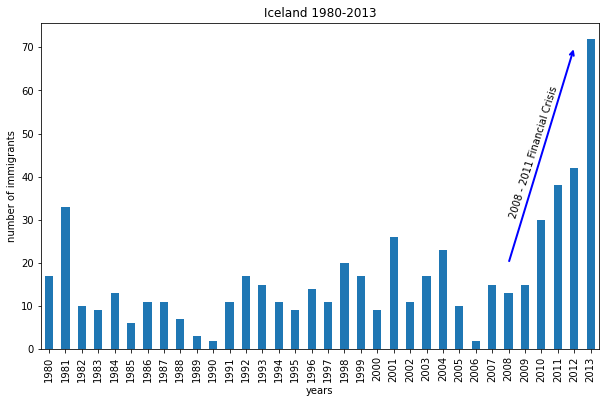

In [38]:
df_iceland.plot(kind='bar',figsize=(10,6))
plt.title("Iceland 1980-2013")
plt.xlabel('years')
plt.ylabel('number of immigrants')
# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )
plt.show()

In [39]:
df_top15 = df_data['Total'].head(15)


In [40]:
df_top15.head()

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
Name: Total, dtype: int64

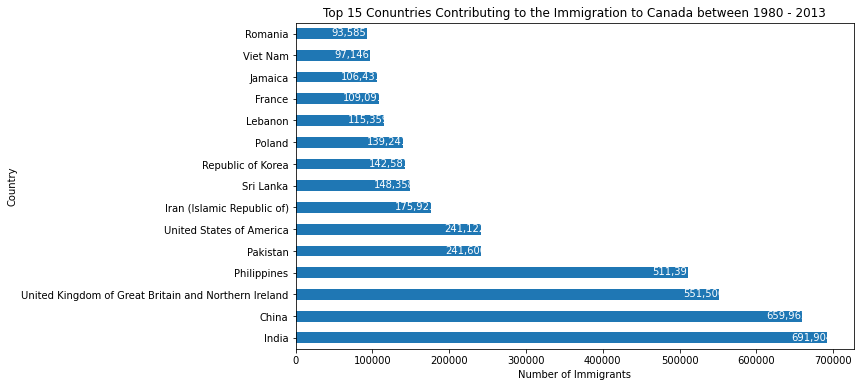

In [41]:
df_top15.plot(kind='barh',figsize=(10,6))
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
# annotate value labels to each country
for index, value in enumerate(df_top15): 
  label = format(int(value), ',') # format int with commas
  # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
  plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()

#Pie Chart

In [42]:
# rom 1980 to 2013, visualize the pourcentage by continents of the total immigrants.
# split, apply, combine
df_continents = df_data.groupby('Continent',axis=0).sum()
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


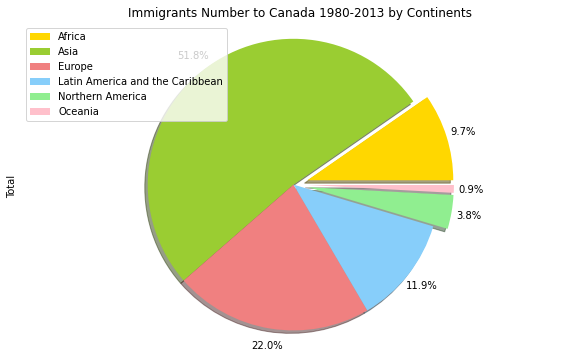

In [43]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind="pie",
                            figsize=(10,6),
                            autopct="%1.1f%%",
                            shadow=True,
                            startangle=0,
                            labels=None,
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list
                            )
# add legend
plt.legend(labels=df_continents.index, loc='upper left') 
plt.title("Immigrants Number to Canada 1980-2013 by Continents")
plt.axis('equal')
plt.show()

#Box Plot

In [44]:
df_japan = df_data.loc[["Japan"],years_list].transpose()

In [45]:
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


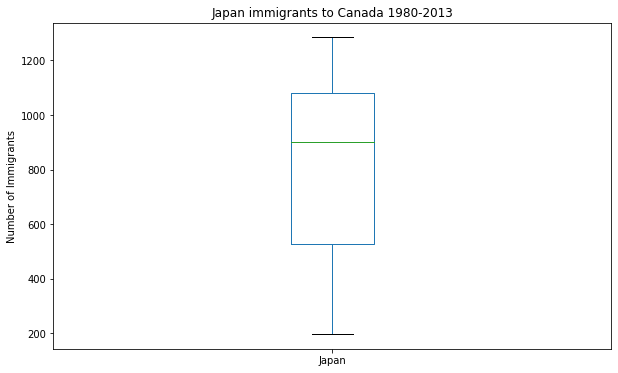

In [46]:
df_japan.plot(kind="box",
              figsize=(10,6)
              )
plt.title("Japan immigrants to Canada 1980-2013")
plt.ylabel("Number of Immigrants")
plt.show()

In [47]:
'''
The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).
25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).
'''

'\nThe minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).\n25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).\n75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).\n'

In [48]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [49]:
df_ci = df_data.loc[["China","India"],years_list].transpose()

In [50]:
df_ci.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


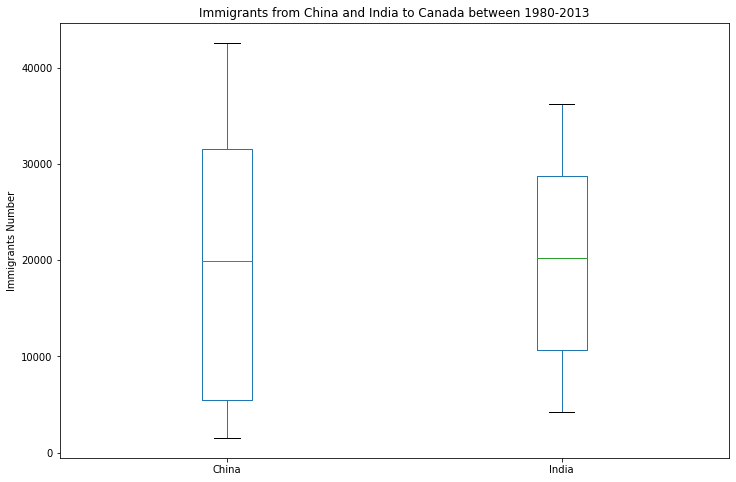

In [51]:
df_ci.plot(kind='box',
           figsize=(12,8)
           )
plt.title("Immigrants from China and India to Canada between 1980-2013")
plt.ylabel('Immigrants Number')
plt.show()

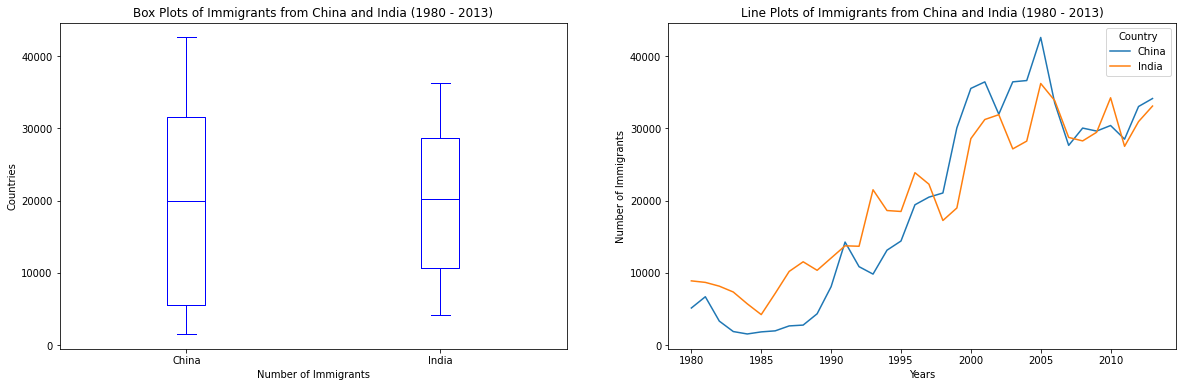

In [52]:
#subplots
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
# Subplot 1: Box plot
df_ci.plot(kind='box', color='blue', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_ci.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [53]:
df_top15.head()

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
Name: Total, dtype: int64

In [54]:
df_top15_decades = df_data.sort_values(['Total'],ascending=False).head(15)

In [55]:
df_top15_decades.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [56]:
decade_80 = list(map(str,range(1980,1990)))
decade_90 = list(map(str,range(1990,2000)))
decade_00 = list(map(str,range(2000,2010)))

In [57]:
serie_1 = df_top15_decades.loc[:,decade_80].sum(axis=1)
serie_2 = df_top15_decades.loc[:,decade_90].sum(axis=1)
serie_3 = df_top15_decades.loc[:,decade_00].sum(axis=1)

In [58]:
new_df_decades = pd.DataFrame({"1980s":serie_1,"1990s":serie_2,"2000s":serie_3})

In [59]:
new_df_decades.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [60]:
new_df_decades.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


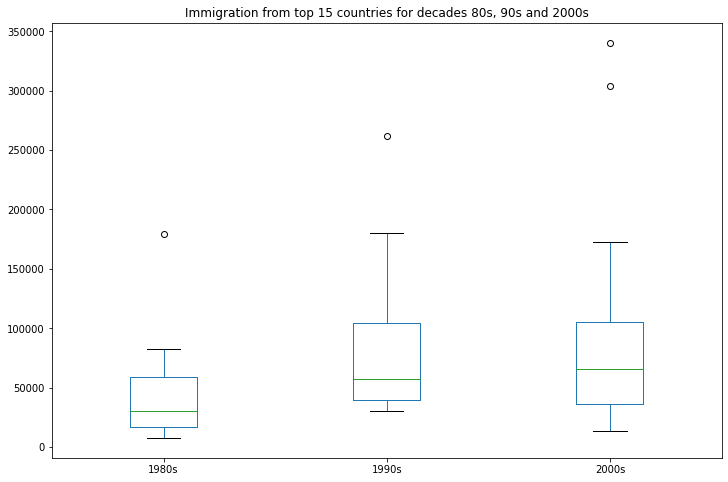

In [61]:
new_df_decades.plot(kind='box',
                    figsize=(12,8)
                    )
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

In [62]:
new_df_decades[new_df_decades['2000s']>209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


#Scatter Plots

In [63]:
df_years_total = pd.DataFrame(df_data[years_list].sum(axis=0))

In [64]:
df_years_total.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [65]:
df_years_total.index = map(int,df_years_total.index)

In [66]:
df_years_total.reset_index(inplace=True)

In [67]:
df_years_total.head()

,index,0
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [68]:
df_years_total.columns = ['years','total']

In [69]:
df_years_total.head()

,years,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


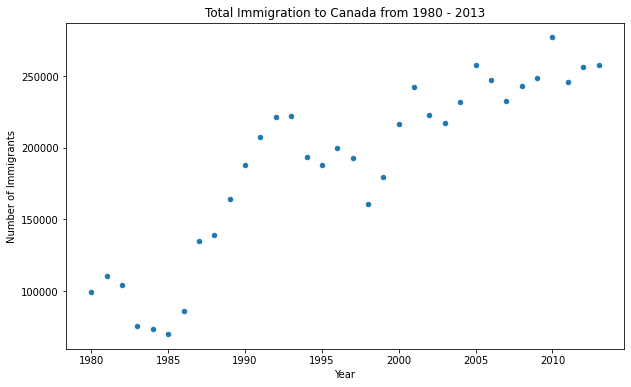

In [70]:
df_years_total.plot(kind='scatter',x="years",y="total",figsize=(10,6))
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [71]:
x = df_years_total['years']
y = df_years_total['total']
fit = np.polyfit(x,y,deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

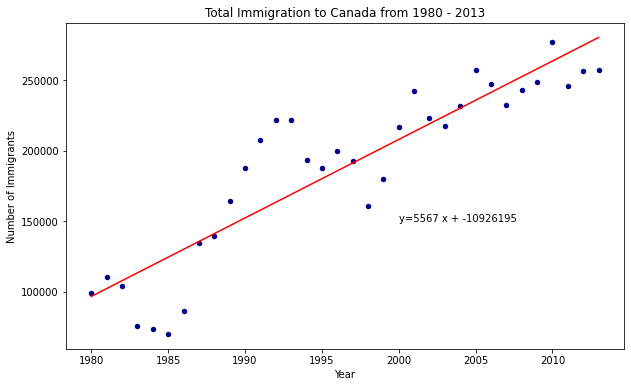

In [72]:
df_years_total.plot(kind='scatter', x='years', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show()

#Bubble Plots

In [73]:
df_b_a = df_data[years_list].transpose()
df_b_a.index = map(int,df_b_a.index)

In [74]:
df_b_a.index.name = "Years"
df_b_a.reset_index(inplace=True)

In [75]:
df_b_a.head()

Country,Years,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,Lebanon,France,Jamaica,Viet Nam,Romania,Haiti,Guyana,Portugal,Egypt,Morocco,Colombia,Iraq,Algeria,Israel,Bangladesh,Germany,Russian Federation,Mexico,Afghanistan,El Salvador,Ukraine,Trinidad and Tobago,Somalia,South Africa,Nigeria,Jordan,Ethiopia,Peru,Turkey,...,Central African Republic,Slovenia,Tajikistan,Bahrain,Botswana,Democratic People's Republic of Korea,Namibia,Turkmenistan,Malawi,"China, Macao Special Administrative Region",Oman,Luxembourg,Cabo Verde,Comoros,Swaziland,Mozambique,Qatar,Tonga,Lesotho,Montenegro,Guinea-Bissau,Samoa,Papua New Guinea,Equatorial Guinea,Liechtenstein,Maldives,Monaco,Canada,Nauru,Andorra,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,863,1409,1729,3198,1191,375,1666,2334,4473,612,325,266,262,80,1403,83,1626,0,409,16,110,0,958,7,1026,81,177,98,317,481,...,4,0,0,0,10,1,0,0,5,0,0,14,1,0,4,0,0,2,1,0,0,3,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,2930,1119,2027,2634,1829,438,3692,2943,3486,660,471,326,245,67,1711,84,1977,0,394,39,295,0,947,10,1118,60,160,59,456,874,...,3,0,0,2,1,1,5,0,4,0,0,4,1,2,1,0,0,4,1,0,0,7,2,0,4,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,5881,1159,2219,2661,2162,583,3498,3575,2432,755,447,360,260,71,1334,86,3062,0,491,39,882,0,972,7,781,58,155,54,401,706,...,1,0,0,1,3,3,5,0,6,0,0,2,2,2,1,7,0,7,1,0,0,4,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,4546,789,1490,2455,3404,543,2860,2650,1433,455,335,244,380,69,541,81,2376,0,490,47,2587,0,766,12,379,58,113,98,241,280,...,0,0,0,1,3,1,3,0,3,0,8,5,0,0,0,2,0,1,2,0,0,1,4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,3588,1253,1169,2508,7583,524,1418,1932,1398,447,248,235,428,63,446,98,1610,0,509,71,2666,0,606,14,271,78,102,154,306,338,...,0,0,0,1,7,4,2,0,2,0,0,1,11,0,10,3,0,2,7,0,1,3,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [76]:
# normlizing Brazil Data
norm_brazil = (df_b_a['Brazil'] - df_b_a['Brazil'].min()) / (df_b_a['Brazil'].max() - df_b_a['Brazil'].min())

In [77]:
# normlizing Argentina Data
norm_argentina = (df_b_a['Argentina'] - df_b_a['Argentina'].min()) / (df_b_a['Argentina'].max() - df_b_a['Argentina'].min())

[]

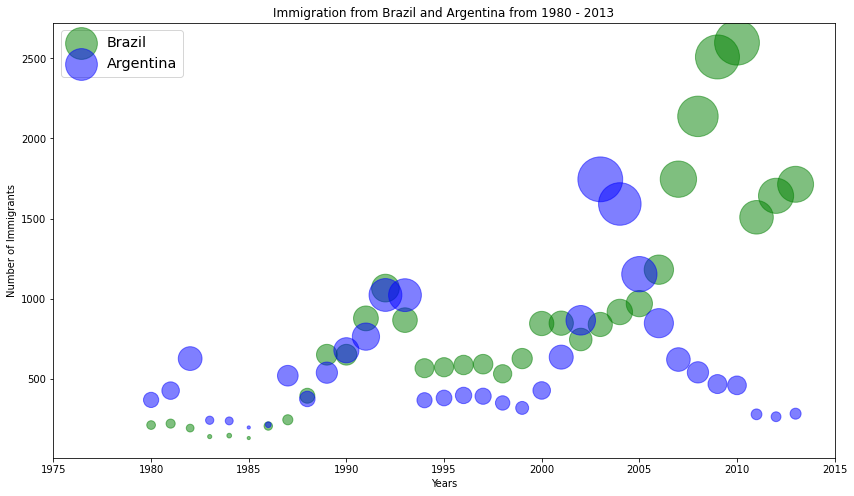

In [78]:
# Brazil
ax0ba = df_b_a.plot(kind='scatter',
                    x='Years',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1ba = df_b_a.plot(kind='scatter',
                    x='Years',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0ba
                   )

ax0ba.set_ylabel('Number of Immigrants')
ax0ba.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0ba.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')
ax0ba.plot()

In [79]:
# more bublle is larger more immigrants number increase in that year

#Waffle Chart

In [80]:
df_d_n_s = df_data.loc[['Denmark', 'Norway', 'Sweden']]

In [81]:
df_d_n_s.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,5866


In [82]:
total_d_n_s = sum(df_d_n_s['Total'])

In [83]:
total_d_n_s

12094

In [84]:
proportion_categories = [float(country_total) / total_d_n_s for country_total in df_d_n_s['Total']]

In [85]:
proportion_categories

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]

In [86]:
for i , proportion in enumerate(proportion_categories):
  print(df_d_n_s.index.values[i] + ": " + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [87]:
waffle_chart_width = 40
waffle_chart_height = 10
total_waffle_chart_tiles = waffle_chart_width * waffle_chart_height
tiles_per_category = [round(proportion * total_waffle_chart_tiles) for proportion in proportion_categories]

In [88]:
tiles_per_category

[129, 77, 194]

In [89]:
waffle_chart = np.zeros((waffle_chart_height,waffle_chart_width))

In [90]:
category_index = 0
tile_index = 0
for col in range(waffle_chart_width):
  for row in range(waffle_chart_height):
    tile_index += 1
    if tile_index > sum(tiles_per_category[0:category_index]):
      category_index += 1
    waffle_chart[row,col] = category_index
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

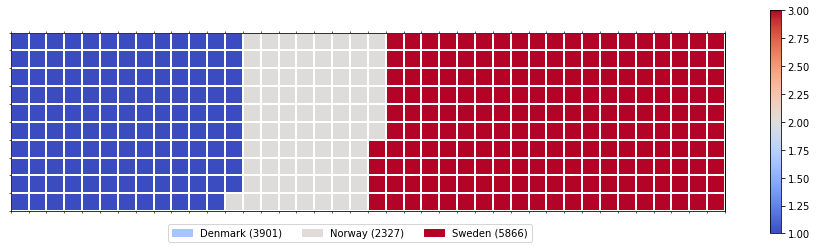

In [91]:
waffle_fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()
ax_waffle = plt.gca()
ax_waffle.set_xticks(np.arange(-.5,(waffle_chart_width),1),minor=True)
ax_waffle.set_yticks(np.arange(-.5,(waffle_chart_height),1),minor=True)
ax_waffle.grid(which="minor",linestyle='-',linewidth=2,color='w')
plt.xticks([])
plt.yticks([])
# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_d_n_s['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

import matplotlib.patches as mpatches
# create legend
legend_handles = []
for i, category in enumerate(df_d_n_s.index.values):
    label_str = category + ' (' + str(df_d_n_s['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_d_n_s.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

#Word Clouds

In [92]:
from wordcloud import WordCloud, STOPWORDS

In [93]:
# download file and save as alice_novel.txt
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt

In [94]:
alice_novel = open("/content/alice_novel.txt",'r').read()

In [95]:
stopwords = set(STOPWORDS)

In [96]:
stopwords.add('said') # add the words said to stopwords
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

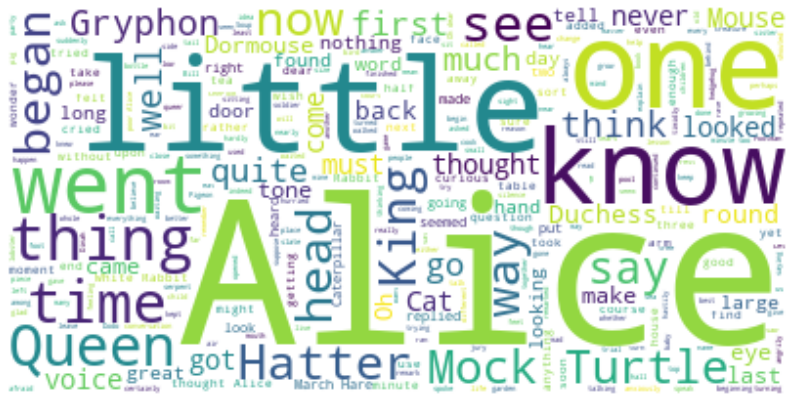

In [97]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
plt.imshow(alice_wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [98]:
#add a mask
from PIL import Image
# download image
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png
    
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))

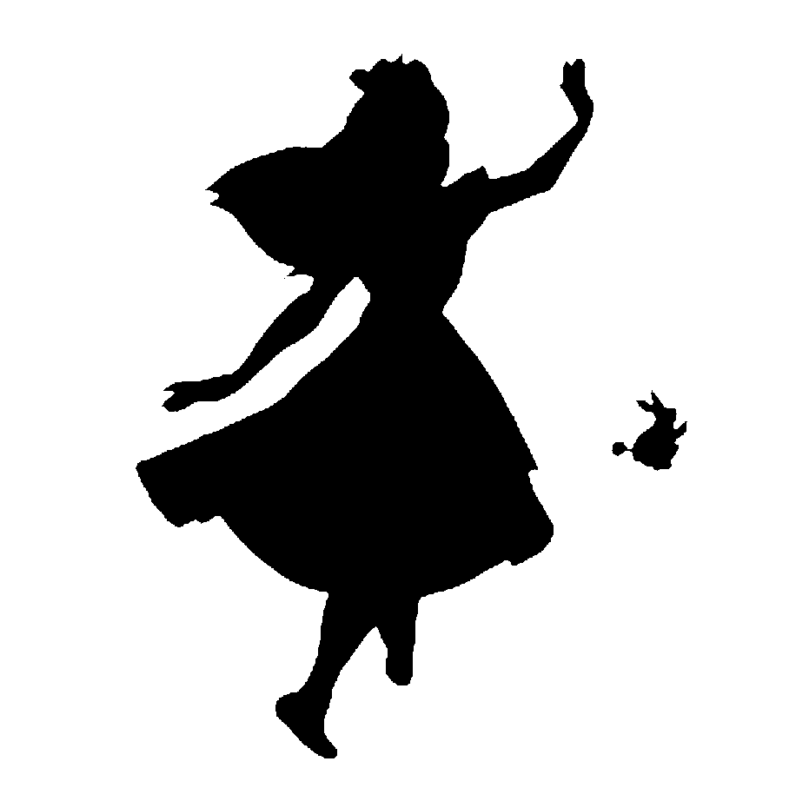

In [99]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

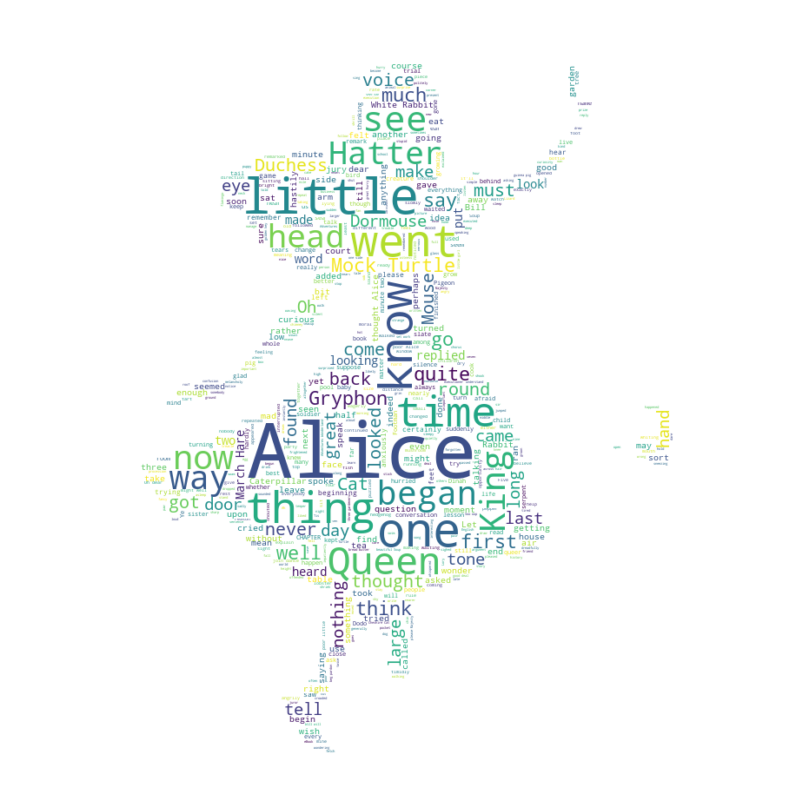

In [100]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [101]:
total_immigrants = sum(df_data['Total'])

In [102]:
print(total_immigrants)

6409153


In [103]:
max_words = 90
word_strings = ""
max_value = 0

In [104]:
for country in df_data.index.values:
  if len(country.split(' ')) == 1 and max_value <= 90:
    max_value += 1
    repeat_times = int(df_data.loc[country,"Total"] / total_immigrants * max_words)
    word_strings = word_strings + ' ' + ((country + " ") * repeat_times)
word_strings

' India India India India India India India India India  China China China China China China China China China  Philippines Philippines Philippines Philippines Philippines Philippines Philippines  Pakistan Pakistan Pakistan  Poland  Lebanon  France  Jamaica  Romania  Haiti  Guyana  Portugal  Egypt  Morocco  Colombia                                                                             '

In [105]:
countries_wc = WordCloud(background_color='white').generate(word_strings)

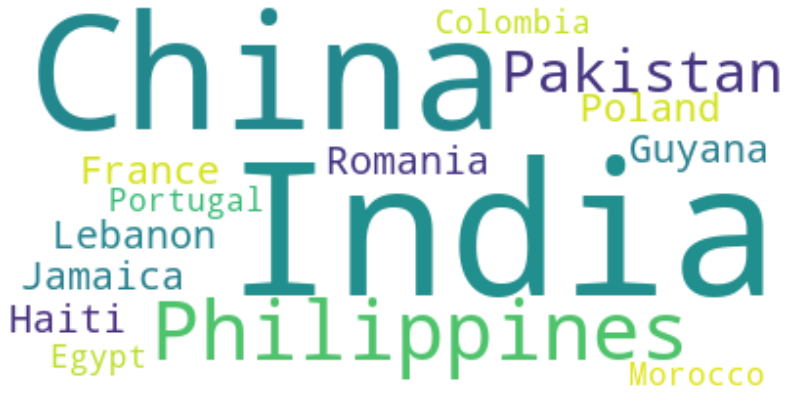

In [106]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(countries_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#Regrission Plots

In [107]:
import seaborn as sbn

In [108]:
df_years_total.head()

,years,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


[Text(0, 0.5, 'Number of Immigrants'),
 Text(0.5, 0, 'year'),
 Text(0.5, 1.0, 'Immigrants to Canada 1980-2013')]

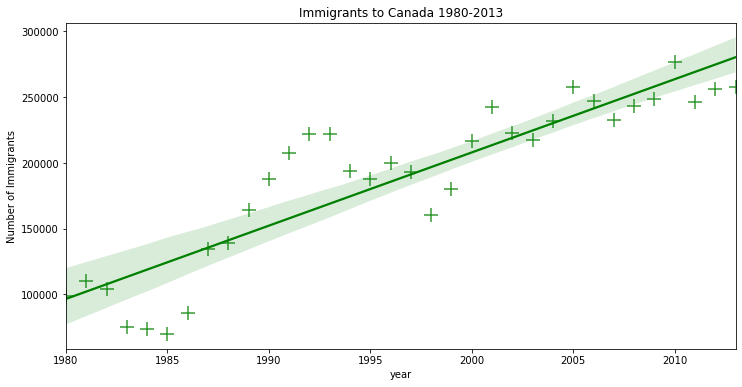

In [109]:
plt.figure(figsize=(12,6))
axsbn = sbn.regplot(x='years',y='total',data=df_years_total,color='green',marker='+',scatter_kws={'s':200})
# sbn.set(font_scale=1.5)
sbn.set_style('whitegrid')
axsbn.set(xlabel="year",ylabel="Number of Immigrants",title="Immigrants to Canada 1980-2013")


#Folium

In [110]:
import folium as flm

In [111]:
world_map = flm.Map(location=[56.130, -106.35],zoom_start=4,tiles='Stamen Terrain')
# Stamen Toner => black and white
# Stamen Terrain => shading and natural vegitation colors


In [112]:
world_map

#Markers on the map

In [113]:
df_incidents = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [114]:
df_incidents.shape

(150500, 13)

In [115]:
limit_rows = 100
df_incidents = df_incidents.loc[:limit_rows,:]

In [116]:
df_incidents.shape

(101, 13)

In [117]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42
sanfrancisco_map = flm.Map(location=[latitude,longitude],zoom_start=12)
sanfrancisco_map

In [118]:
# add group features to the map 
group_incidents = flm.map.FeatureGroup()

In [119]:
#first method with default markers added
# for lat,lon in zip(df_incidents.Y, df_incidents.X):
#   group_incidents.add_child(
#       flm.CircleMarker(
#           [lat,lon],
#           color='yellow',
#           fill=True,
#           fill_color="blue",
#           radius= 5,
#           fill_opacity=0.6
#       )
#   )
# # add pop-up text to each marker on the map
# latitude_list = list(df_incidents.Y)
# longitude_list = list(df_incidents.X)
# category_list = list(df_incidents.Category)
# for lat,log,cat in zip(latitude_list,longitude_list,category_list):
#   flm.Marker([lat,log],popup=cat).add_to(sanfrancisco_map)
# sanfrancisco_map.add_child(group_incidents)

#Second method without the default markers
for lat,lon,label in zip(df_incidents.Y,df_incidents.X,df_incidents.Category):
  flm.CircleMarker(
      [lat,lon],
      popup=label,
      color='yellow',
      fill=True,
      fill_color='blue',
      radius=5,
      fill_opacity=0.6
  ).add_to(sanfrancisco_map)
sanfrancisco_map
# to see the change. please run from the cell when we declared the sanfrancisco_map

In [120]:
#Clusters
from folium import plugins
cluster_params = plugins.MarkerCluster().add_to(sanfrancisco_map)
# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    flm.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(cluster_params)
sanfrancisco_map

#Choropleth Maps

In [121]:
# download countries geojson file
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json

In [122]:
world_map = flm.Map(zoom_start=2,location=[0,0])

In [123]:
world_geo = r'world_countries.json' # geojson file
df_data.reset_index(inplace=True)

In [124]:
df_data['Country'].head()

0                                                India
1                                                China
2    United Kingdom of Great Britain and Northern I...
3                                          Philippines
4                                             Pakistan
Name: Country, dtype: object

In [125]:
threshold_scale = np.linspace(df_data['Total'].min(),
                              df_data['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

world_map.choropleth(
    geo_data=world_geo,
    data=df_data,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    threshold_scale=threshold_scale,
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
